In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp, tanh
from tokenize import Exponent
from enum import Enum
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

<ipython-input-1-ab1075e3f70d>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [5]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.000000,0.1903,0.06422,...,10.62,14.10,66.53,342.9,0.12340,0.07204,0.0000,0.00000,0.3105,0.08151
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.18120,0.1901,0.08296,0.1988,0.07053
398,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.11200,0.18790,0.2079,0.05556,0.2590,0.09158
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.102800,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.17890,0.42330,0.4784,0.20730,0.3706,0.11420
94,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.15510,0.42030,0.5203,0.21150,0.2834,0.08234


In [7]:
y_train.head()

140    1
397    1
398    1
17     0
94     0
dtype: int64

In [8]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

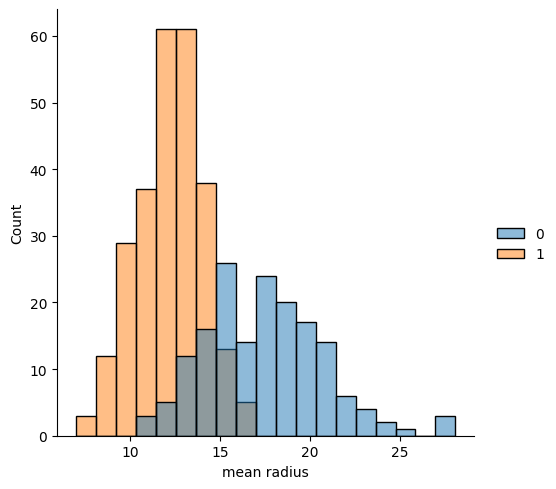

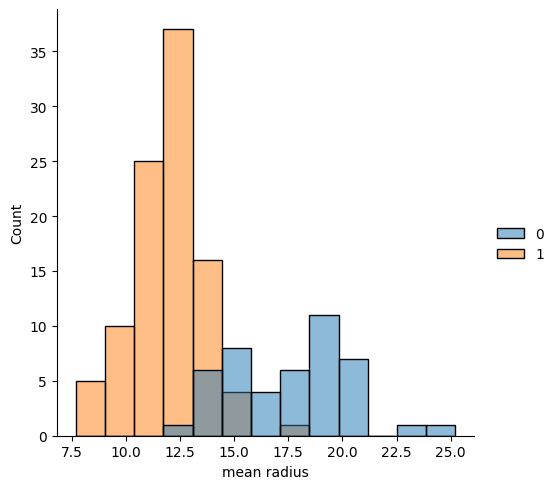

In [9]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

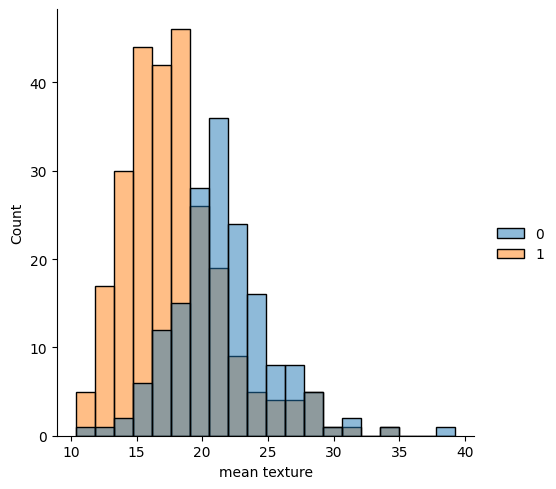

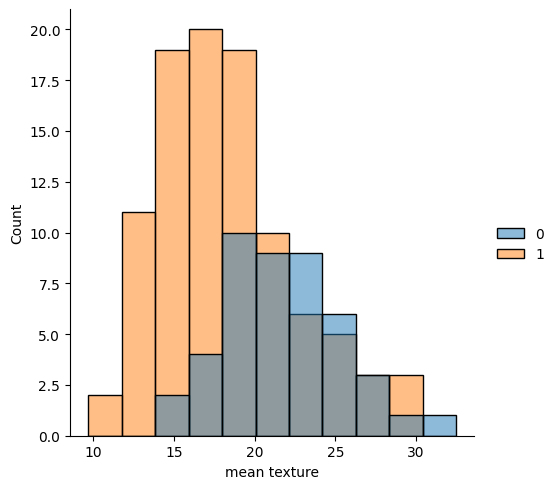

In [10]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

In [11]:
# Create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

In [12]:
DATADIR = "/content/drive/MyDrive/breastcancerdataset/training"

In [13]:
CATEGORIES = ['benign', 'malignant']

In [14]:
import pathlib
data_dir = pathlib.Path(DATADIR)

In [15]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

3164


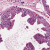

In [16]:
benign = list(data_dir.glob('benign/*'))
PIL.Image.open(str(benign[0]))

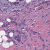

In [17]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3164 files belonging to 2 classes.
Using 2532 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3164 files belonging to 2 classes.
Using 632 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


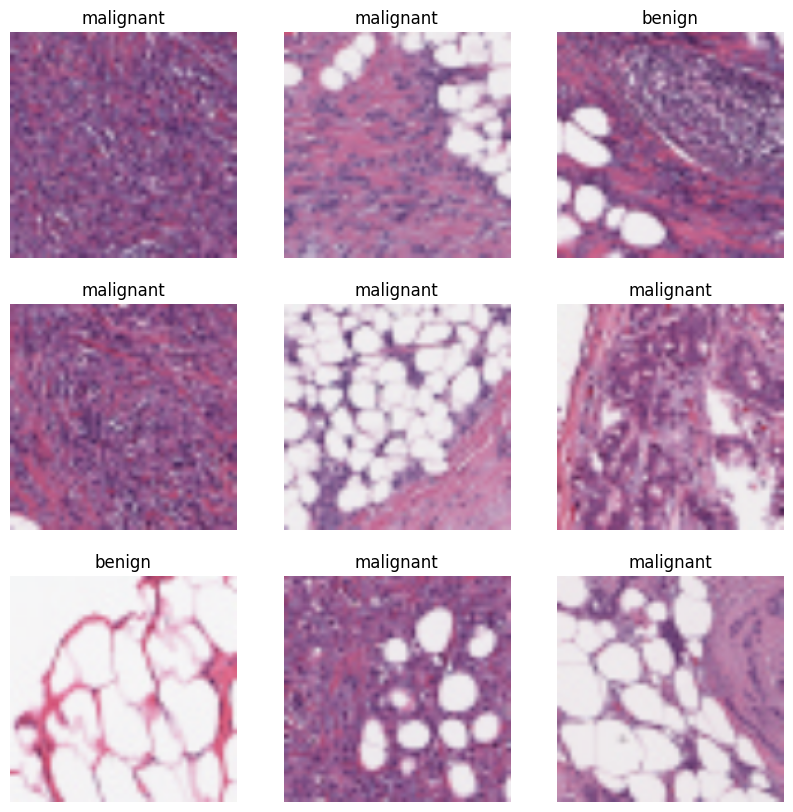

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

(32, 180, 180, 3)
(32,)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
normalization_layer = layers.Rescaling(1./255)

In [26]:
  normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
  image_batch, labels_batch = next(iter(normalized_ds))
  first_image = image_batch[0]
  # Notice the pixel values are now in `[0,1]`.
  print(np.min(first_image), np.max(first_image))

0.12026135 0.9705067


In [27]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
80/80 [==============================] - 109s 1s/step - loss: 0.7650 - accuracy: 0.5592 - val_loss: 0.5653 - val_accuracy: 0.7658
Epoch 2/10
80/80 [==============================] - 2s 20ms/step - loss: 0.5071 - accuracy: 0.7776 - val_loss: 0.4126 - val_accuracy: 0.8212
Epoch 3/10
80/80 [==============================] - 2s 20ms/step - loss: 0.4000 - accuracy: 0.8242 - val_loss: 0.3335 - val_accuracy: 0.8687
Epoch 4/10
80/80 [==============================] - 2s 21ms/step - loss: 0.3842 - accuracy: 0.8397 - val_loss: 0.3587 - val_accuracy: 0.8560
Epoch 5/10
80/80 [==============================] - 2s 21ms/step - loss: 0.3401 - accuracy: 0.8535 - val_loss: 0.4363 - val_accuracy: 0.8180
Epoch 6/10
80/80 [==============================] - 2s 20ms/step - loss: 0.3428 - accuracy: 0.8523 - val_loss: 0.3154 - val_accuracy: 0.8703
Epoch 7/10
80/80 [==============================] - 2s 20ms/step - loss: 0.3194 - accuracy: 0.8618 - val_loss: 0.3502 - val_accuracy: 0.8608
Epoch 8/10
80

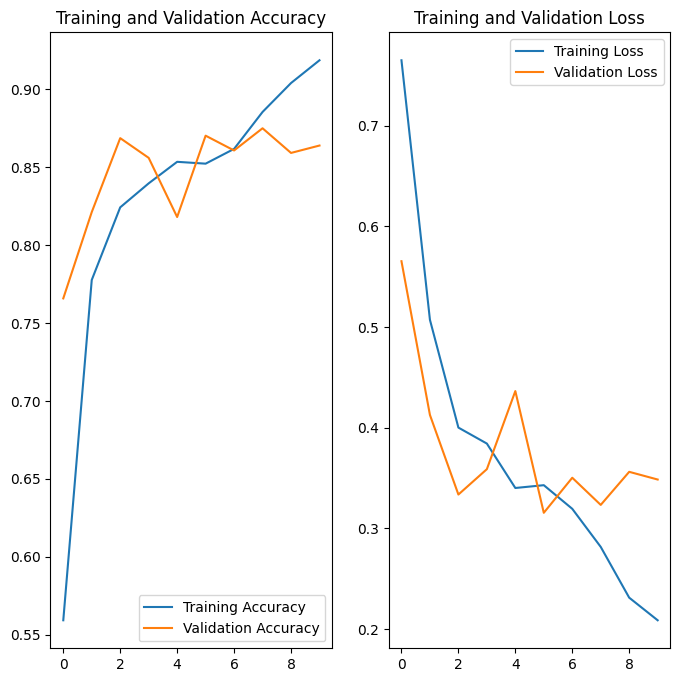

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

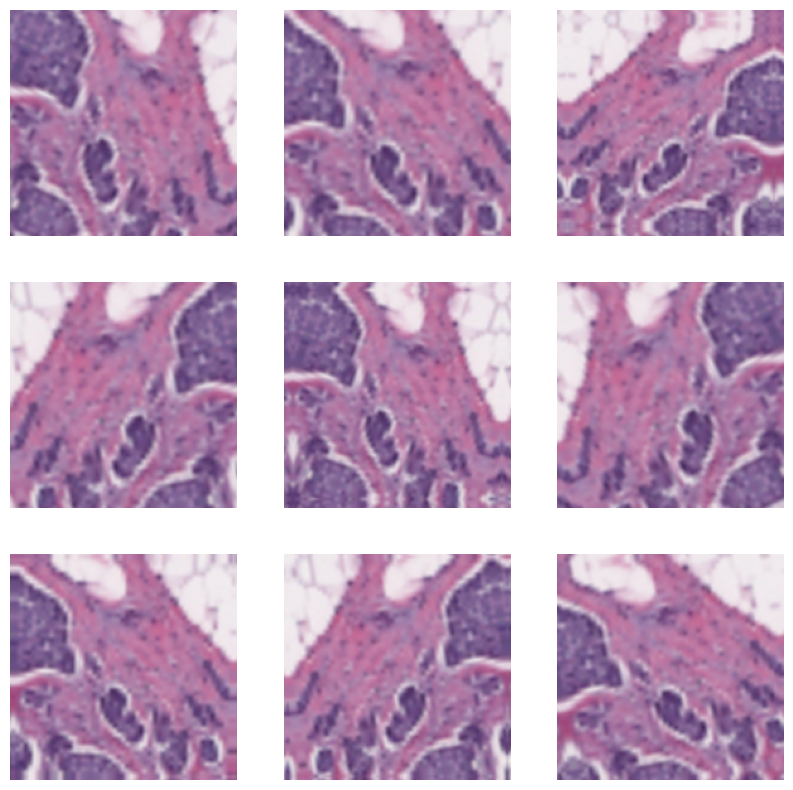

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [34]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [39]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
80/80 [==============================] - 3s 35ms/step - loss: 0.2703 - accuracy: 0.8863 - val_loss: 0.2538 - val_accuracy: 0.8987
Epoch 2/25
80/80 [==============================] - 2s 31ms/step - loss: 0.2616 - accuracy: 0.8985 - val_loss: 0.2504 - val_accuracy: 0.9051
Epoch 3/25
80/80 [==============================] - 2s 30ms/step - loss: 0.2697 - accuracy: 0.8851 - val_loss: 0.2892 - val_accuracy: 0.8972
Epoch 4/25
80/80 [==============================] - 2s 30ms/step - loss: 0.2758 - accuracy: 0.8934 - val_loss: 0.2450 - val_accuracy: 0.9130
Epoch 5/25
80/80 [==============================] - 2s 31ms/step - loss: 0.2747 - accuracy: 0.8878 - val_loss: 0.2737 - val_accuracy: 0.8908
Epoch 6/25
80/80 [==============================] - 3s 34ms/step - loss: 0.2584 - accuracy: 0.8981 - val_loss: 0.2437 - val_accuracy: 0.9114
Epoch 7/25
80/80 [==============================] - 3s 31ms/step - loss: 0.2291 - accuracy: 0.9127 - val_loss: 0.2366 - val_accuracy: 0.9130
Epoch 8/25
80

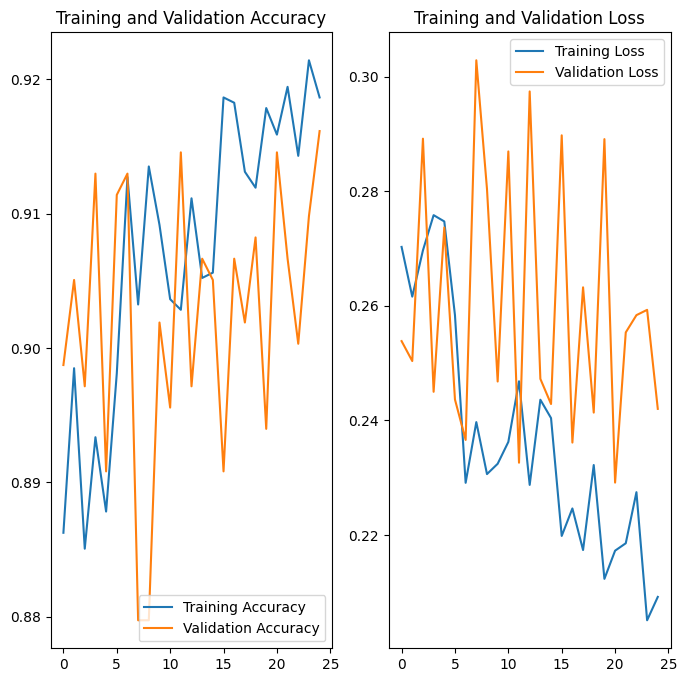

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model.save("/content/drive/MyDrive/breastcancerdataset/breastcancerprediction1.h5")